# Test With Llama 3.2

# Imports

In [1]:
import os
import pickle
import transformers
import torch
from transformers import AutoTokenizer, AutoModel
import torch.nn.functional as F
import seaborn as sns
import matplotlib.pyplot as plt

# Environment Setup

In [2]:
# There are important!
torch.backends.cuda.enable_mem_efficient_sdp(False)
torch.backends.cuda.enable_flash_sdp(False)

## Model Initialization

### meta-llama/Llama-3.2-1B

In [3]:
model_id = "/media/ANONYMOUS/Files/models/meta-llama/Llama-3.2-1B"

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModel.from_pretrained(model_id, torch_dtype=torch.bfloat16, device_map="cuda")

### meta-llama/Llama-3.2-1B-Instruct

In [4]:
model_id = "/media/ANONYMOUS/Files/models/meta-llama/Llama-3.2-1B-Instruct"

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModel.from_pretrained(model_id, torch_dtype=torch.bfloat16, device_map="cuda")

### meta-llama/Llama-3.2-3B

In [ ]:
model_id = "/media/ANONYMOUS/Files/models/meta-llama/Llama-3.2-3B"

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModel.from_pretrained(model_id, torch_dtype=torch.bfloat16, device_map="cuda")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

### meta-llama/Llama-3.2-3B-Instruct

In [3]:
model_id = "/media/ANONYMOUS/Files/models/meta-llama/Llama-3.2-3B-Instruct"

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModel.from_pretrained(model_id, torch_dtype=torch.bfloat16, device_map="cuda")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

### meta-llama/CodeLlama-7b-hf

In [3]:
model_id = "/media/ANONYMOUS/Files/models/meta-llama/CodeLlama-7b-hf"

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModel.from_pretrained(model_id, torch_dtype=torch.bfloat16, device_map="cuda")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

# Get Dataset

In [4]:
project_base_path = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
project_base_path

'/media/ANONYMOUS/Files/projects/FALCON'

In [5]:
gpt4o_generated_cti_path = os.path.join(project_base_path, "data/generation/yara/yara-rules_v1.pkl")
gpt4o_generated_cti_path

'/media/ANONYMOUS/Files/projects/FALCON/data/generation/yara/yara-rules_v1.pkl'

In [6]:
def load_from_pickle(file_path):
    """
    Loads data from a pickle file.

    :param file_path: Path to the pickle file
    :return: Loaded data
    """
    try:
        with open(file_path, 'rb') as file:
            return pickle.load(file)
    except Exception as e:
        print(f"Error loading data from pickle: {e}")
        return None

In [7]:
# Load the data back from the pickle file
file_path = gpt4o_generated_cti_path

gpt_yara_cti_dict = load_from_pickle(file_path)
size = len(gpt_yara_cti_dict.keys()) 
print(size)

4588


In [8]:
def get_first_n_elements(dictionary: dict, n: int) -> dict:
    """
    Get the first n elements of a dictionary.

    :param dictionary: The input dictionary
    :param n: The number of elements to retrieve
    :return: A dictionary with the first n elements
    """
    return dict(list(dictionary.items())[:n])

In [9]:
yara_cti_sample_dict = get_first_n_elements(gpt_yara_cti_dict, 10)

In [10]:
yara_cti_sample_dict

{'rule MSIETabularActivex\n{\n        meta:\n                ref = "CVE-2010-0805"\n                impact = 7\n                hide = true\n                author = "@d3t0n4t0r"\n        strings:\n                $cve20100805_1 = "333C7BC4-460F-11D0-BC04-0080C7055A83" nocase fullword\n                $cve20100805_2 = "DataURL" nocase fullword\n                $cve20100805_3 = "true"\n        condition:\n                ($cve20100805_1 and $cve20100805_3) or (all of them)\n}': 'Rule Name\n  MSIETabularActivex\n\nDescription\n  This YARA rule detects a specific vulnerability (CVE-2010-0805) associated with an ActiveX control. The rule targets potentially malicious strings that could be used in exploit attempts related to this vulnerability.\n\nReference\n  CVE-2010-0805\n\nIndicators / String Matches\n  This rule matches the following strings:\n\n  String ID\tPattern\tNotes\n  $cve20100805_1\t"333C7BC4-460F-11D0-BC04-0080C7055A83"\tActiveX control CLSID\n  $cve20100805_2\t"DataURL"\tPos

In [11]:
yaras, ctis = zip(*yara_cti_sample_dict.items())
yaras = list(yaras)
ctis = list(ctis)

In [12]:
len(yaras), len(ctis)

(10, 10)

In [13]:
yaras[0]

'rule MSIETabularActivex\n{\n        meta:\n                ref = "CVE-2010-0805"\n                impact = 7\n                hide = true\n                author = "@d3t0n4t0r"\n        strings:\n                $cve20100805_1 = "333C7BC4-460F-11D0-BC04-0080C7055A83" nocase fullword\n                $cve20100805_2 = "DataURL" nocase fullword\n                $cve20100805_3 = "true"\n        condition:\n                ($cve20100805_1 and $cve20100805_3) or (all of them)\n}'

In [14]:
ctis[0]

'Rule Name\n  MSIETabularActivex\n\nDescription\n  This YARA rule detects a specific vulnerability (CVE-2010-0805) associated with an ActiveX control. The rule targets potentially malicious strings that could be used in exploit attempts related to this vulnerability.\n\nReference\n  CVE-2010-0805\n\nIndicators / String Matches\n  This rule matches the following strings:\n\n  String ID\tPattern\tNotes\n  $cve20100805_1\t"333C7BC4-460F-11D0-BC04-0080C7055A83"\tActiveX control CLSID\n  $cve20100805_2\t"DataURL"\tPossible exploit-related term\n  $cve20100805_3\t"true"\tPotential Boolean indicator used in exploitation\n\n  All string patterns use nocase and fullword modifiers, allowing detection regardless of case and requiring exact word matches.\n\nCondition Logic\n  The rule triggers if:\n\n  The ActiveX control CLSID ($cve20100805_1) and the Boolean indicator ($cve20100805_3) are both present.\n\n  Alternatively, if all strings ($cve20100805_1, $cve20100805_2, and $cve20100805_3) are fo

# Attention Functions

In [15]:
def get_tokens_from_texts(text: str) -> dict:
    """
    Tokenizes the input text into a list of tokens.

    :param text: The input text
    :return: A list of tokens
    """
    return tokenizer(text, return_tensors="pt").to("cuda")

In [16]:
get_tokens_from_texts("Hey how are you doing today?")

{'input_ids': tensor([[    1, 18637,   920,   526,   366,  2599,  9826, 29973]],
       device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}

In [17]:
def get_tokens_list_from_texts(texts: list) -> list[dict]:
    """
    Tokenizes a list of input texts into a list of tokens.

    :param texts: The list of input texts
    :return: A list of tokenized texts
    """
    return [get_tokens_from_texts(text) for text in texts]


In [18]:
get_tokens_list_from_texts(yaras)

[{'input_ids': tensor([[    1,  5751,   341,  5425,  2544,   370,  1070,  9966, 29916,    13,
          29912,    13,  4706, 12700, 29901,    13, 18884,  2143,   353,   376,
          29907, 12064, 29899, 29906, 29900, 29896, 29900, 29899, 29900, 29947,
          29900, 29945, 29908,    13, 18884, 10879,   353, 29871, 29955,    13,
          18884,  9563,   353,  1565,    13, 18884,  4148,   353, 17962, 29881,
          29941, 29873, 29900, 29876, 29946, 29873, 29900, 29878, 29908,    13,
           4706,  6031, 29901,    13, 18884,   395, 29883,   345, 29906, 29900,
          29896, 29900, 29900, 29947, 29900, 29945, 29918, 29896,   353,   376,
          29941, 29941, 29941, 29907, 29955,  5371, 29946, 29899, 29946, 29953,
          29900, 29943, 29899, 29896, 29896, 29928, 29900, 29899,  5371, 29900,
          29946, 29899, 29900, 29900, 29947, 29900, 29907, 29955, 29900, 29945,
          29945, 29909, 29947, 29941, 29908,   302,   542,   559,  2989,  1742,
             13, 18884,   

In [19]:
def get_mean_embedding_from_tokens(tokens: dict) -> torch.Tensor:
    """
    Get the mean embeddings from the tokenized input.

    :param tokens: The tokenized input
    :return: The mean embeddings
    """
    with torch.no_grad():
        embedding = model(**tokens).last_hidden_state
    return embedding.mean(dim=1).squeeze()

In [20]:
test_embedding = get_mean_embedding_from_tokens(get_tokens_list_from_texts(["Hey how are you doing today?"])[0])

In [21]:
test_embedding

tensor([-0.0752, -0.8945,  0.0791,  ...,  0.0371, -0.2793, -0.2217],
       device='cuda:0', dtype=torch.bfloat16)

In [22]:
test_embedding.size()

torch.Size([4096])

In [23]:
def get_mean_embedding_list_from_tokens_list(tokens_list: list[dict]) -> list:
    """
    Get the embeddings from a list of tokenized inputs.

    :param tokens_list: The list of tokenized inputs
    :return: A list of embeddings
    """
    return [get_mean_embedding_from_tokens(tokens) for tokens in tokens_list]

In [24]:
test_yara_embeddings = get_mean_embedding_list_from_tokens_list(get_tokens_list_from_texts(yaras))

In [25]:
test_yara_embeddings

[tensor([-0.1104,  0.2129,  0.0014,  ..., -0.7422,  0.5469, -0.2852],
        device='cuda:0', dtype=torch.bfloat16),
 tensor([ 0.0120,  0.0737,  0.0713,  ..., -0.6602,  0.4355,  0.0369],
        device='cuda:0', dtype=torch.bfloat16),
 tensor([-0.0933,  0.2871,  0.0060,  ..., -0.3164,  0.2422, -0.2871],
        device='cuda:0', dtype=torch.bfloat16),
 tensor([-0.1055,  0.2256, -0.0344,  ..., -0.2520,  0.3574, -0.2695],
        device='cuda:0', dtype=torch.bfloat16),
 tensor([-0.0052,  0.1001, -0.1895,  ..., -0.9688,  0.7305, -0.2236],
        device='cuda:0', dtype=torch.bfloat16),
 tensor([-0.0056,  0.0452, -0.1357,  ..., -0.2256,  0.1309, -0.2490],
        device='cuda:0', dtype=torch.bfloat16),
 tensor([-0.0859,  0.1787, -0.1118,  ..., -0.5000,  0.4004, -0.3887],
        device='cuda:0', dtype=torch.bfloat16),
 tensor([-0.0320,  0.1953, -0.0444,  ..., -0.4492,  0.3477, -0.3262],
        device='cuda:0', dtype=torch.bfloat16),
 tensor([ 0.1250,  0.1973, -0.2148,  ..., -0.4160,  0.35

In [26]:
len(test_yara_embeddings)

10

In [27]:
test_yara_embeddings[0].size()

torch.Size([4096])

In [28]:
test_cti_embeddings = get_mean_embedding_list_from_tokens_list(get_tokens_list_from_texts(ctis))

In [29]:
len(test_cti_embeddings)

10

In [30]:
test_cti_embeddings[0].size()

torch.Size([4096])

In [31]:
def stack_embeddings(embedding_list: list[torch.Tensor]) -> torch.Tensor:
    """
    Stacks a list of 1D tensors (embeddings) into a single 2D tensor.

    Args:
        embedding_list (List[Tensor]): List of [2048] tensors

    Returns:
        Tensor: Stacked tensor of shape [N, 2048]
    """
    return torch.stack(embedding_list, dim=0)


In [32]:
def compute_attention_softmax_matrix(tensor_a, tensor_b):
    """
    Computes a [B, B] attention matrix using cosine similarity between
    [seq_len, hidden_dim] slices of two tensors, then applies row-wise softmax.

    Args:
        tensor_a (Tensor): Tensor of shape [B, seq_len, hidden_dim]
        tensor_b (Tensor): Tensor of shape [B, seq_len, hidden_dim]

    Returns:
        Tensor: Softmax-normalized attention matrix of shape [B, B]
    """
    
    assert tensor_a.size(0) == tensor_b.size(0), "Batch sizes must match"
    assert tensor_a.size(-1) == tensor_b.size(-1), "Hidden dimensions must match"
    
    # Step 2: Compute dot product matrix [num_desc x num_rules]
    dot_product_matrix = torch.matmul(tensor_a, tensor_b.T)


    # Apply softmax row-wise to turn into attention weights
    attention_weights = F.softmax(dot_product_matrix, dim=1)
    return attention_weights




In [33]:
def plot_attention_map(attention_tensor, title="Attention Map", figsize=(7.5, 4.5), annot=False):
    """
    Plots a heatmap of a [B, B] attention matrix using seaborn.

    Args:
        attention_tensor (Tensor): Attention tensor of shape [B, B]
        title (str): Title of the plot
        figsize (tuple): Size of the figure
        annot (bool): Whether to annotate the heatmap values
    """
    
    if isinstance(attention_tensor, torch.Tensor):
        attention_tensor = attention_tensor.to(dtype=torch.float32).detach().cpu().numpy()
    
    
    plt.figure(figsize=figsize)
    sns.heatmap(attention_tensor, annot=True, cmap="YlGnBu", 
                xticklabels=[f"Rule {i+1}" for i in range(len(yaras))], 
                yticklabels=[f"Desc {i+1}" for i in range(len(ctis))])
    plt.title("Softmax Attention Weights: Descriptions → Rules")
    plt.xlabel("Yara Rules")
    plt.ylabel("Descriptions")
    plt.tight_layout()
    plt.show()

In [34]:
def round_small_values_to_zero(tensor, threshold=1e-5):
    """
    Rounds values in the tensor below a threshold to zero.

    Args:
        tensor (torch.Tensor): Input tensor
        threshold (float): Threshold below which values are zeroed

    Returns:
        torch.Tensor: Tensor with small values rounded to zero
    """
    return torch.where(tensor < threshold, torch.tensor(0.0, dtype=tensor.dtype, device=tensor.device), tensor)


# Generate Attention Map

In [35]:
test_yara_embeddings_stacked = stack_embeddings(test_yara_embeddings)

In [36]:
test_yara_embeddings_stacked.shape

torch.Size([10, 4096])

In [37]:
test_cti_embeddings_stacked = stack_embeddings(test_cti_embeddings)

In [38]:
test_cti_embeddings_stacked.shape

torch.Size([10, 4096])

In [39]:
attn_matrix = compute_attention_softmax_matrix(test_yara_embeddings_stacked, test_cti_embeddings_stacked)

In [40]:
print(attn_matrix.shape)  # torch.Size([10, 10])

torch.Size([10, 10])


In [41]:
attn_matrix

tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 2.4450e-36, 0.0000e+00, 0.0000e+00,
         5.3926e-32, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [9.8047e-01, 1.7944e-02, 2.3980e-36, 3.4638e-24, 0.0000e+00, 0.0000e+00,
         4.1742e-18, 5.2770e-32, 1.5777e-28, 1.7679e-35],
        [2.0664e-09, 4.4816e-38, 1.0000e+00, 1.0535e-20, 0.0000e+00, 0.0000e+00,
         1.9273e-22, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.4228e-21, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
         4.2555e-18, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [5.0000e-01, 5.0000e-01, 5.9322e-28, 1.0332e-09, 1.4668e-30, 1.6530e-37,
         1.0332e-09, 4.6851e-14, 1.1623e-16, 7.1138e-22],
        [1.0000e+00, 0.0000e+00, 3.3061e-37, 8.3074e-07, 0.0000e+00, 1.2657e-14,
         1.5250e-08, 7.2704e-33, 1.9273e-22, 1.1864e-27],
        [1.1269e-07, 0.0000e+00, 3.3061e-37, 8.3074e-07, 0.0000e+00, 0.0000e+00,
         1.0000e+00, 2.6056e-23, 3.5414e-24, 3.5414e-24],
        [6.1393e-06, 7.2704

# Plot Attention

### meta-llama/Llama-3.2-1B

In [55]:
attn_matrix = round_small_values_to_zero(attn_matrix)

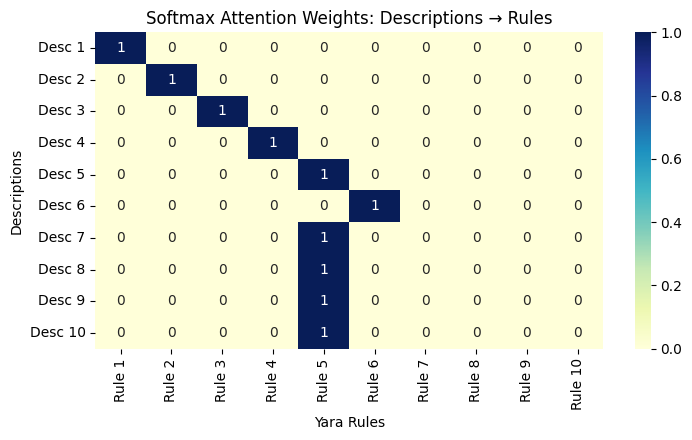

In [56]:
plot_attention_map(attn_matrix, title="Cosine Similarity Attention", annot=True)

### meta-llama/Llama-3.2-1B-Instruct

In [46]:
attn_matrix = round_small_values_to_zero(attn_matrix)

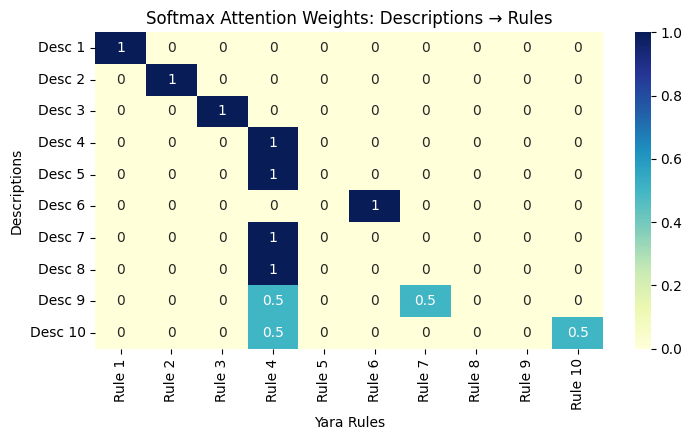

In [47]:
plot_attention_map(attn_matrix, title="Cosine Similarity Attention", annot=True)

### meta-llama/Llama-3.2-3B

In [43]:
attn_matrix = round_small_values_to_zero(attn_matrix)

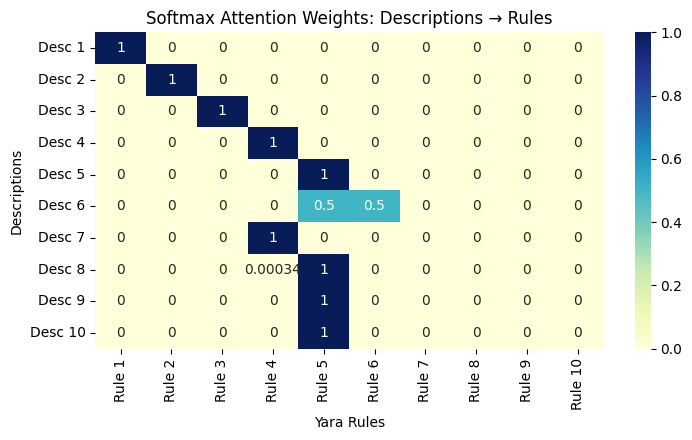

In [44]:
plot_attention_map(attn_matrix, title="Cosine Similarity Attention", annot=True)

### meta-llama/Llama-3.2-3B-Instruct

In [43]:
attn_matrix = round_small_values_to_zero(attn_matrix)

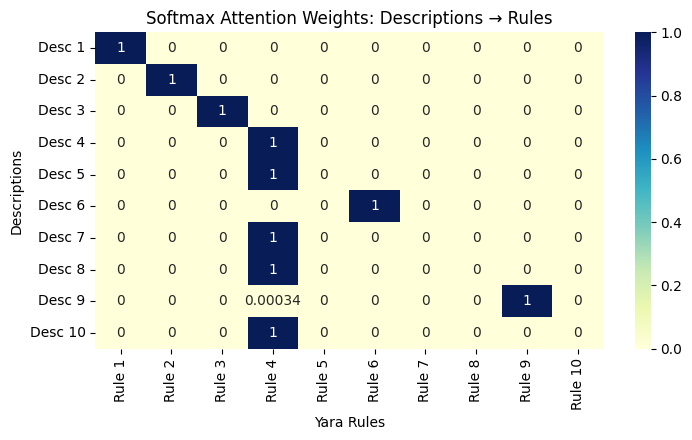

In [44]:
plot_attention_map(attn_matrix, title="Cosine Similarity Attention", annot=True)

### meta-llama/CodeLlama-7b-hf

In [43]:
attn_matrix = round_small_values_to_zero(attn_matrix)

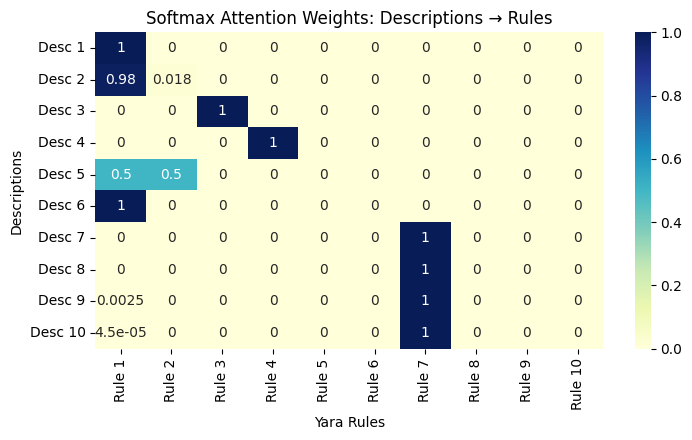

In [44]:
plot_attention_map(attn_matrix, title="Cosine Similarity Attention", annot=True)